<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/prediction_temperature_boosting%20/prediction_temperature_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RepeatedKFold,
    GridSearchCV,
    ParameterGrid
)

from sklearn.inspection import permutation_importance

# **Información**

---



**Calidad del Aire Municipio de Duitama**

---


La vertical de calidad de aire de Duitama está compuesta por sensores IoT que realizan las mediciones de diferentes contaminantes ubicados en diferentes puntos de la ciudad, como se enuncia a continuación:

1. Sensor de calidad del aire desarrollado por el Centro Internacional de Física de la Universidad Nacional de Colombia CIF

• Nombres de los dispositivos en el set de datos: AirQualityUnit01, AirQualityUnit02, AQ_SEP
• Variables de medición: Temperatura, Humedad relativa, CO2, CO, PM2.5, PM5, PM10
• Tasa de transmisión: cada 5 min
• Lugares de instalación:
- Antiguo Terminal de transportes de Duitama, Calle 17 # 18-32
- Avenida circunvalar # 16A - 18, Duitama, Boyacá
- Calle 20 # 30-00, Avenida Camillo Torres con carrera 30, Duitama, Boyacá

**Información de la Entidad**
- Área o dependencia	Oficina Asesora de TIC
- Nombre de la Entidad	Alcaldía de Duitama
- Departamento	Boyacá
- Municipio	Duitama
- Orden	Territorial

**Última Actualización**: 26 de marzo de 2024

**Suministró los datos**: Municipio de Duitama

**Propósito** Construir un modelo con la capacidad de estimar la temperatura.

**path data**: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Calidad-del-Aire-Municipio-de-Duitama/aghd-ge2f/about_data


# **Diccionario de datos**
---

- **Fecha**: Fecha de emisión del registro generado por el sensor
- **Nombre Equipo**:	Nombre asignado al sensor
- **co**: Medición de gas monóxido de carbono realizada por el sensor
- **co2**: Medición de gas monóxido de carbono y oxigeno realizada por el sensor
- **pm10**: Medición de partículas sólidas o liquidas que se encuentran en la atmosfera realizada por el sensor
- **pm2_5**: Partículas muy pequeñas en el aire que contiene un diámetro 2.5 micrómetros, medición realizada por el sensor (aproximadamente 1 diezmilésimo de pulgada) o menos de diámetro
- **pm5**: Mide las condiciones del particulado del aire, diámetro 5 es el tamaño de las micras de la polució
- **Humedad Relativa**: Dato cantidad vapor del aire generado por el sensor
- **Temperatura**: Medición grados de temperatura generado por el sensor

**Funciones**

---


parametros importantes

**learning_rate**: reduce la contribución de cada árbol multiplicando su influencia original por este valor.

**max_iter**: número de árboles incluidos en el modelo.

**max_depth**: profundidad máxima que pueden alcanzar los árboles.

**min_samples_leaf:** número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división.

**max_leaf_nodes**: número máximo de nodos terminales que pueden tener los árboles.

**early_stopping**: Si es 'auto', se activa la parada temprana si el tamaño de la muestra es superior a 10000. Si es True, se activa la parada temprana; en caso contrario, se desactiva.

**validation_fraction**: proporción de datos separados del conjunto entrenamiento y empleados como conjunto de validación para determinar la parada temprana (early stopping).

**n_iter_no_change**: número de iteraciones consecutivas en las que no se debe superar el tol para que el algoritmo se detenga (early stopping). Si su valor es None se desactiva la parada temprana.

**tol**: porcentaje mínimo de mejora entre dos iteraciones consecutivas por debajo del cual se considera que el modelo no ha mejorado.



**Config**

---

In [5]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
title_data = 'Temperatura del Aire Municipio de Duitama'
paleta = sns.color_palette("tab10").as_hex()
warnings.filterwarnings("ignore")
random_seedd = 12354

# **Data**
---

In [6]:
data = pd.read_csv('./data/calidad_aire_municipio_duitama.csv')

In [8]:
data.head()

,Fecha,Nombre Equipo,co,co2,pm10,pm2_5,pm5,Humedad Relativa,Temperatura
0,08/01/2023 12:00:19 AM,AirQualityUnit02,2.00,450.00,5.00,4.00,4.00,0.00,0.00
1,08/01/2023 12:02:25 AM,AirQualityUnit02,3.00,448.00,6.00,6.00,4.00,65.40,13.60
2,08/01/2023 12:04:31 AM,AirQualityUnit02,4.00,453.00,26.00,22.00,14.00,52.70,0.80
3,08/01/2023 12:08:36 AM,AirQualityUnit02,6.00,459.00,13.00,10.00,7.00,0.00,0.00
4,08/01/2023 12:10:41 AM,AirQualityUnit02,7.00,461.00,10.00,9.00,6.00,53.00,0.80


**split**

In [11]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=random_seedd
)

**model**

In [14]:
model = HistGradientBoostingRegressor(
    max_iter=10,
    loss='squared_error',
    random_state=1235
)

In [15]:
model.fit(X_train, y_train)

HistGradientBoostingRegressor(max_iter=10, random_state=1235)

In [18]:
y_predict = model.predict(X_test)
rmse = mean_squared_error(
    y_test,
    y_predict,
    squared=False
)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.394973070460927


El modelo tiene un error de 3.4 en la temperatura.

# **Optimización de hiperparámetros**
**Numero estimadores**

In [22]:
train_scores = []
cv_scores = []

max_iter_range = range(1, 500, 25)

for max_iter in max_iter_range:

  model = HistGradientBoostingRegressor(
      max_iter=max_iter,
      random_state=random_seedd
  )

  model.fit(X_train, y_train)
  y_predict = model.predict(X_train)
  rmse = mean_squared_error(
      y_train,
      y_predict,
      squared=False
  )

  train_scores.append(rmse)

  scores = cross_val_score(
      estimator=model,
      X=X_train,
      y=y_train,
      scoring   = 'neg_root_mean_squared_error',
      cv = 5
  )

  cv_scores.append(-1*scores.mean())



Valor óptimo de n_estimators: 151


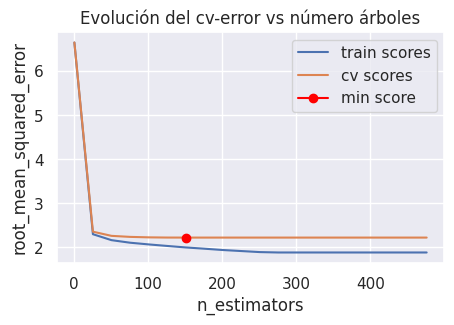

In [23]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_iter_range, train_scores, label="train scores")
ax.plot(max_iter_range, cv_scores, label="cv scores")
ax.plot(max_iter_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {max_iter_range[np.argmin(cv_scores)]}")

- El error del modelo se estabiliza, consiguiendo un mínimo con 151 árboles.

**Learning rate**


In [24]:
resultados = {}

learning_rates_grid = [0.001, 0.01, 0.1]
max_iter_grid = [10,20,100,200,300,400,500,1000,2000,5000]

In [25]:
for learning_rate in learning_rates_grid:

  train_scores = []
  cv_scores = []

  for n_estimator in max_iter_grid:

    model = HistGradientBoostingRegressor(
        max_iter = n_estimator,
        learning_rate = learning_rate,
        random_state=random_seedd
    )
    model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    rmse = mean_squared_error(
        y_train,
        y_predict,
        squared=False
    )

    train_scores.append(rmse)

    scores = cross_val_score(
        estimator = model,
        X = X_train,
        y = y_train,
        scoring = 'neg_root_mean_squared_error',
        cv = 5
    )

    cv_scores.append(-1*scores.mean())

  resultados[learning_rate] = {'train_scores': train_scores, 'cv_scores': cv_scores}

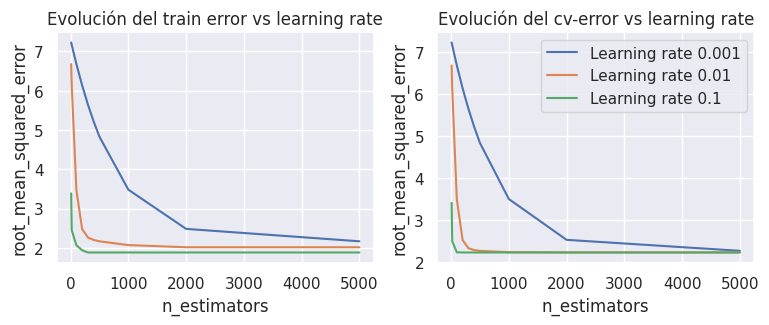

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

for key, value in resultados.items():
    axs[0].plot(max_iter_grid, value['train_scores'], label=f"Learning rate {key}")
    axs[0].set_ylabel("root_mean_squared_error")
    axs[0].set_xlabel("n_estimators")
    axs[0].set_title("Evolución del train error vs learning rate")

    axs[1].plot(max_iter_grid, value['cv_scores'], label=f"Learning rate {key}")
    axs[1].set_ylabel("root_mean_squared_error")
    axs[1].set_xlabel("n_estimators")
    axs[1].set_title("Evolución del cv-error vs learning rate")
    plt.legend();

Puede observarse que, cuanto mayor es el valor del learning rate, más rápido aprende el modelo pero antes puede aparecer el overfitting. En este caso, los errores estimados por validación cruzada indican que, el mejor modelo se consigue con un learning rate de 0.1.

**Max depth**

In [30]:
train_scores = []
cv_scores = []

max_depths = [1,3,5,10,20]

In [32]:
for max_depth in max_depths:

  model = HistGradientBoostingRegressor(
      max_iter=25,
      max_depth = max_depth,
      random_state=random_seedd
  )

  model.fit(X_train, y_train)
  y_predict = model.predict(X_train)
  rmse = mean_squared_error(
      y_train,
      y_predict,
      squared =False
  )

  train_scores.append(rmse)

  scores = cross_val_score(
      model,
      X_train,
      y_train,
      scoring   = 'neg_root_mean_squared_error',
      cv = 5,
  )

  cv_scores.append(-1*scores.mean())

Valor óptimo de max_depth: 20


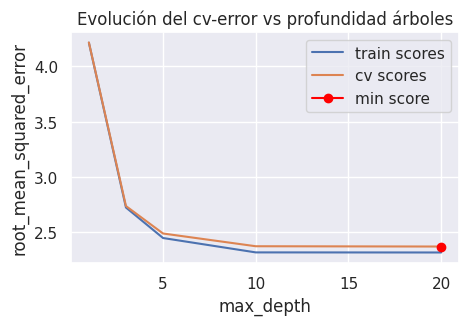

In [33]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_depths, train_scores, label="train scores")
ax.plot(max_depths, cv_scores, label="cv scores")
ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_depth")
ax.set_title("Evolución del cv-error vs profundidad árboles")
plt.legend();
print(f"Valor óptimo de max_depth: {max_depths[np.argmin(cv_scores)]}")